## Comparative Analysis of All Five Sources

In this notebook, I will be compiling the key data and observations from each of the individual sources and comparing the five. I will start with the normalized frequency counts of specific words. I'll then dive into some of the common KWIC contexts of words like "origins", "conspiracy", "theory" before then honing in on the key conspiracy theory words that are referenced in some but not all sources. Finally I will utilize a keyness score.

In [1]:
import os
import json
import random
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import seaborn as sn
from collections import Counter

In [2]:
cd_doc = open('../data/text/china_daily/cd_composite_text.txt').read()
nyt_doc = open('../data/text/nyt/nyt_composite_text.txt').read()
g_doc = open('../data/text/guardian/g_composite_text.txt').read()
dt_doc = open('../data/text/daily_telegraph/dt_composite_text.txt').read()
ht_doc = open('../data/text/hindustan_times/ht_composite_text.txt').read()

In [3]:
# looking at the length of the string objects
for cdoc in [cd_doc, nyt_doc, g_doc, dt_doc, ht_doc]:
    print(len(cdoc))

2664719
7094029
56752419
1828348
2372915


In [4]:
%run functions.ipynb

In [5]:
characters_to_remove = '!,.()[]|"'

The following just tokenizes and creates distributions.

In [6]:
cd_comp_toks = tokenize(cd_doc, lowercase=True, strip_chars=characters_to_remove)
nyt_comp_toks = tokenize(nyt_doc, lowercase=True, strip_chars=characters_to_remove)
cd_dist = Counter(cd_comp_toks)
nyt_dist= Counter(nyt_comp_toks)

In [7]:
g_files = [f for f in os.listdir('../data/text/guardian') if f.startswith('the-guardian-') and f.endswith('.txt')]

In [8]:
g_dist= Counter()

for fname in g_files:
    fpath = os.path.join('..','data','text', 'guardian', fname)
    text = open(fpath).read()
    tokens = tokenize(text, lowercase=True, strip_chars=characters_to_remove)
    g_dist.update(tokens)

In [9]:
dt_comp_toks = tokenize(dt_doc, lowercase=True, strip_chars=characters_to_remove)
ht_comp_toks = tokenize(ht_doc, lowercase=True, strip_chars=characters_to_remove)
dt_dist= Counter(dt_comp_toks)
ht_dist= Counter(ht_comp_toks)

In [10]:
cd_tok_cnt = sum(cd_dist.values())
nyt_tok_cnt = sum(nyt_dist.values())
dt_tok_cnt = sum(dt_dist.values())
g_tok_cnt = sum(g_dist.values())
ht_tok_cnt = sum(ht_dist.values())

I will now create a dataframe demonstrating normalized frequencies of each term in each source.

In [11]:
origin_terms= ['laboratory','market','military','conspiracy','army','transparency','origins','wuhan','theory','detrick','bioweapon','cold-chain','imported']
origin_compare = compare_item(cd_dist, nyt_dist, dt_dist, g_dist, ht_dist, origin_terms[:9], 100000)
origin_df = pd.DataFrame(origin_compare, columns=['word','China Daily','NY Times','Daily Telegraph','Guardian','Hindustan Times'])
origin_df

,word,China Daily,NY Times,Daily Telegraph,Guardian,Hindustan Times
0,laboratory,41.041034,9.843786,56.667802,4.737287,19.422725
1,market,50.026349,36.093882,51.099290,22.785140,27.559272
2,military,11.170932,19.687572,27.842562,9.716384,16.273094
3,conspiracy,16.756398,12.002511,7.533870,5.660563,6.561731
4,army,2.185617,4.749195,11.137025,3.528234,10.236301
5,transparency,6.071159,3.367611,9.826787,3.956898,13.123463
6,origins,23.070404,34.194204,57.650481,11.969618,45.669651
7,wuhan,161.007132,54.313521,116.938759,20.762725,84.515101
8,theory,9.713854,17.010753,9.499227,4.429528,8.661486


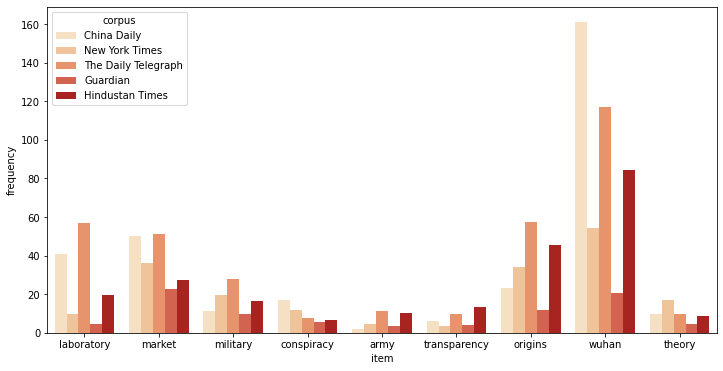

In [12]:
compare_plot(origin_compare, 'China Daily', 'New York Times', 'The Daily Telegraph', 'Guardian', 'Hindustan Times')

In [13]:
excluded_compare = compare_item(cd_dist, nyt_dist, dt_dist, g_dist, ht_dist, origin_terms[9:], 100000)
excluded_df = pd.DataFrame(excluded_compare, columns=['word','China Daily','NY Times','Daily Telegraph','Guardian','Hindustan Times'])
excluded_df

,word,China Daily,NY Times,Daily Telegraph,Guardian,Hindustan Times
0,detrick,2.671310,0.000000,0.000000,0.010991,0.787408
1,bioweapon,0.000000,0.863490,0.000000,0.076940,0.000000
2,cold-chain,12.628010,0.000000,0.000000,0.153879,0.787408
3,imported,517.505579,3.022215,6.223631,5.649572,15.223217


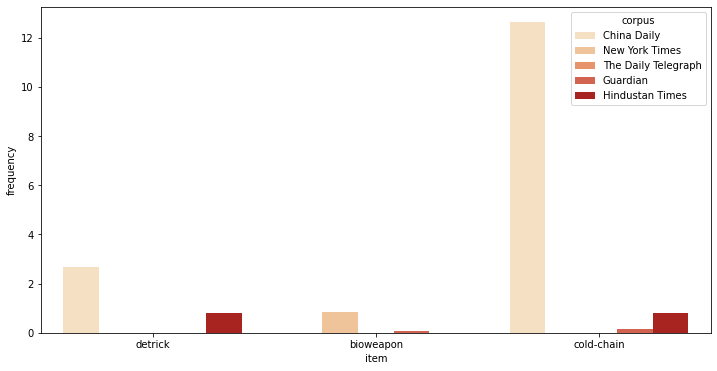

In [14]:
compare_plot(excluded_compare[:-1], 'China Daily', 'New York Times', 'The Daily Telegraph', 'Guardian', 'Hindustan Times')

FASCINATING! Loook at which words aren't included in which sources and which are....very interesting. Also wide variation in frequencies.

In [15]:
nyt_bigram_dist=Counter()
nyt_trigram_dist=Counter()


csize = len(nyt_comp_toks)
chsize = int(csize/10)
for cidx in range(0,csize,chsize):
    ch_toks = nyt_comp_toks[cidx:cidx+chsize]
    bigrams=get_ngram_tokens(ch_toks,2)
    trigrams=get_ngram_tokens(ch_toks,3)
    nyt_bigram_dist.update(bigrams)
    nyt_trigram_dist.update(trigrams)

In [16]:
cd_bigram_dist = Counter()
cd_trigram_dist = Counter()

csize = len(cd_comp_toks)
chsize = int(csize/10)
for cidx in range(0,csize,chsize):
    ch_toks = cd_comp_toks[cidx:cidx+chsize]
    bigrams=get_ngram_tokens(ch_toks,2)
    trigrams=get_ngram_tokens(ch_toks,3)
    cd_bigram_dist.update(bigrams)
    cd_trigram_dist.update(trigrams)

In [17]:
calculate_keyness(cd_bigram_dist, nyt_bigram_dist, top=25)

WORD                     A Freq.   B Freq.   Keyness
covid-19 cases           3052      39        7773.938
new covid-19             2197      6         5801.144
outside china            2161      35        5446.115
cases on                 1698      61        4051.893
novel coronavirus        843       55        1876.010
hopkins university       617       6         1587.417
johns hopkins            617       21        1479.518
for covid-19             746       106       1421.121
prevention and           530       20        1258.901
and control              516       17        1240.843
the novel                587       59        1212.179
on oct                   467       19        1101.068
covid-19 deaths          348       13        827.396
positive for             557       161       824.528
health commission        361       35        750.889
tests positive           273       8         662.849
the epidemic             404       93        658.773
in us                    270      

In [18]:
calculate_keyness(nyt_bigram_dist, cd_bigram_dist, top=25)

WORD                     A Freq.   B Freq.   Keyness
york times               579       30        193.446
the coronavirus          1554      228       192.658
new york                 1254      168       179.668
one of                   856       85        177.517
the new                  1019      121       172.375
of a                     1415      212       169.197
it was                   969       120       155.170
the president            366       11        152.698
he was                   485       32        140.695
for a                    774       92        130.764
health care              284       6         130.442
but the                  533       47        123.798
united states            1043      157       123.691
in the                   5537      1431      122.971
president trump          268       6         121.396
was a                    528       48        119.292
the united               1183      199       113.231
going to                 389       26        1

In [19]:
keyness_df = calculate_keyness(cd_trigram_dist, nyt_trigram_dist, print_table=False, top=-1, keyness_threshold=-100000)

<AxesSubplot:xlabel='Keyness'>

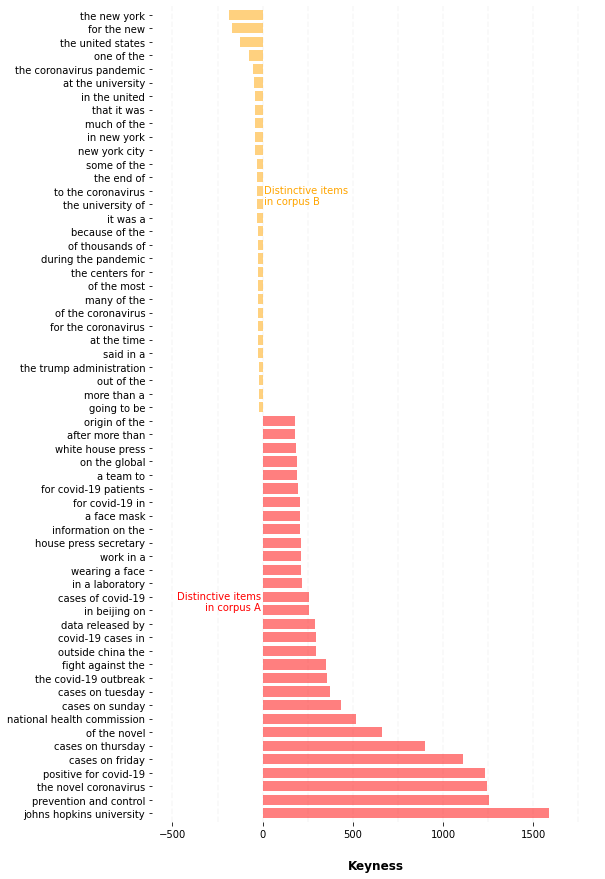

In [20]:
plot_keyitems(keyness_df, 30, c1='red', c2='orange')

Observation:

Wow this is interesting. Some notable differences: Trump administration, global vs. US; origins in the; cases #.

In [23]:
show_keyitems(keyness_df, 20, 
              c1='red', c2='orange',
              corpusA='China Daily', corpusB='New York Times')

In [22]:
keyness_terms = ['origins','theory','conspiracy','transparency','laboratory']
key_data=[]

for word in keyness_terms:
    cd_freq = cd_dist.get(word,0)
    nyt_freq = nyt_dist.get(word,0)
    norm_cd = cd_freq/len(cd_comp_toks)*100000
    norm_nyt = nyt_freq/len(nyt_comp_toks)* 100000

    keyness = log_likelihood(cd_freq, len(cd_comp_toks), nyt_freq, len(nyt_comp_toks))
    key_data.append((word, cd_freq, norm_cd, nyt_freq, norm_nyt, keyness))
    key_df = pd.DataFrame(key_data, columns= ['word','cd_freq','norm_cd','nyt_freq','norm_nyt','keyness'])
key_df

,word,cd_freq,norm_cd,nyt_freq,norm_nyt,keyness
0,origins,95,23.070404,396,34.194204,-12.820958
1,theory,40,9.713854,197,17.010753,-11.756075
2,conspiracy,69,16.756398,139,12.002511,4.927507
3,transparency,25,6.071159,39,3.367611,5.006619
4,laboratory,169,41.041034,114,9.843786,140.128671


Observation:

The data for transparency is really fascinating. Ironic that China Daily is mentioning transparency so much when other sources are critical of that.